### Необходимо внедрить на фласк одну из моделей, которая у вас была в курсе.

In [1]:
# !pip install flask_ngrok
# !pip install h2o

In [2]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 7 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_aip91f
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.179 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
PATH_TO_MODEL = '/content/drive/MyDrive/Colab Notebooks/GLM_model_python_1606347737003_1'
model_glm_binaminal = h2o.load_model(PATH_TO_MODEL)

In [5]:
def return_NewH2o_Frame():
  columns = ['Exposure', 'LicAge', 'DrivAge', 'HasKmLimit', 'BonusMalus', 'Dataset']
  return h2o.H2OFrame([[0,0,0,0,0,0]], column_names = columns)

In [6]:
return_NewH2o_Frame()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Exposure,LicAge,DrivAge,HasKmLimit,BonusMalus,Dataset
0,0,0,0,0,0


In [7]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/', methods=['GET', 'POST'])
def test():

  hf = return_NewH2o_Frame()
  json_input = request.json

  hf[0, 'Exposure'] = json_input['Exposure']
  hf[0, 'LicAge'] = json_input['LicAge']
  hf[0, 'DrivAge'] = json_input['DrivAge']
  hf[0, 'HasKmLimit'] = json_input['HasKmLimit']
  hf[0, 'BonusMalus'] = json_input['BonusMalus']
  hf[0, 'Dataset'] = json_input['Dataset']

  prediction_binaminal = model_glm_binaminal.predict(hf)

  predict = prediction_binaminal.as_data_frame()['predict'][0]/1
  p0 = prediction_binaminal.as_data_frame()['p0'][0]
  p1 = prediction_binaminal.as_data_frame()['p1'][0]

  print(prediction_binaminal.as_data_frame())
  return jsonify({'ID': json_input['ID'], 'predict': predict, 'p0': p0, 'p1': p1})

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c84b90e973c8.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
   predict        p0        p1
0        0  0.934193  0.065807


127.0.0.1 - - [26/Nov/2020 00:28:42] "GET / HTTP/1.1" 200 -


### Отчет : скрин экрана с ответом + ноутбук оборачивания модели на Flask

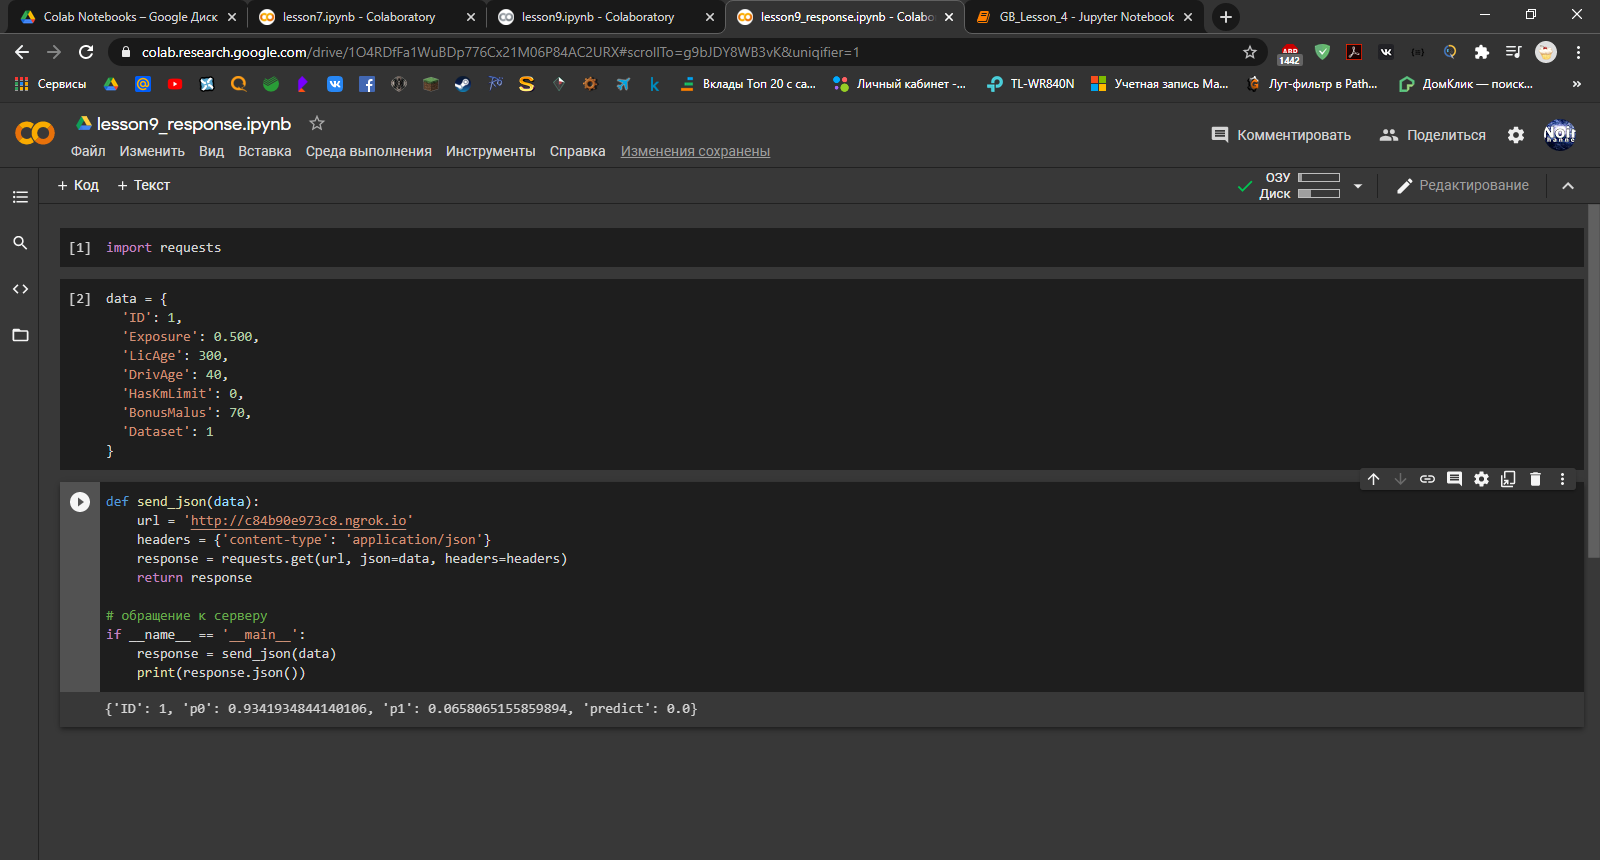

In [1]:
from IPython.display import Image
Image("Отчет.png")